In [1]:
import pandas as pd
df=pd.read_csv('Missing_fixed.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [2]:
df.value_counts('Potability')

Potability
0    1998
1    1278
dtype: int64

In [3]:
#pip install imblearn

In [4]:
X=df[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
Y=df['Potability']

In [7]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=5)

# 

<font size=25, face='Times New Roman'>Dataset Before Balancing</font>

Text(0.5, 1.0, 'Original Data')

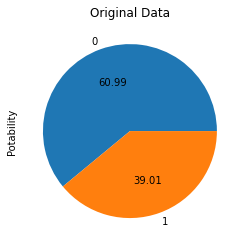

In [9]:
resampled=Y.value_counts().plot.pie(autopct='%.2f')
resampled.set_title('Original Data')

# 

<font size=25, face='Times New Roman'>Dataset After Balancing</font>

In [10]:

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority',random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X,Y)

In [11]:
balanced_class=Y_resampled.value_counts()
X_resampled.shape

(3996, 9)

In [12]:
balanced_class

0    1998
1    1998
Name: Potability, dtype: int64

Text(0.5, 1.0, 'Over Sampling')

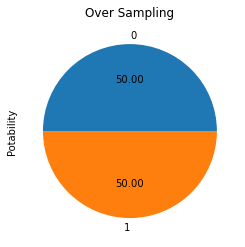

In [13]:
balanced_df=Y_resampled.value_counts().plot.pie(autopct='%.2f')
balanced_df.set_title('Over Sampling')

In [14]:
#X_resampled.to_csv('Data.csv', index=False)

In [15]:
#Y_resampled.to_csv('Class.csv',index=False)

# 

<font size=25, face='Times New Roman'>Model Development</font>

In [4]:
models = []
models.append(('SVM', SVC(C=10, gamma=0.01, kernel='poly')))
models.append(("RF",RandomForestClassifier(max_features= 3, min_samples_leaf=4, min_samples_split=12, n_estimators= 5)))
#models.append(("NN",MLPClassifier(hidden_layer_sizes=(100,),activation= 'tanh', alpha= 0.05, learning_rate='0.0001', solver='adam')))
models.append(('LR',LogisticRegression(C=10,random_state = 0)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=8,min_samples_split= 2)))

NameError: name 'SVC' is not defined

# 

<font size=25, face='Times New Roman'>Training and Testing</font>

In [1]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=1)

<font size=20, face='Times New Roman'>Training</font>

In [3]:
for name, model in models: 
    model.fit(X_train,y_train)
    y_pred=model.predict(X_train)
    confusion=confusion_matrix(y_train,y_pred)

    TP = confusion[1, 1]#0,0
    TN = confusion[0, 0]#1,1
    FP = confusion[0, 1]#0,1
    FN = confusion[1, 0]#1,0

    TPR = TP/(TP+FN)#Recall, Sensitivity
    TNR = TN/(TN+FP)  
    ACC = (TP+TN)/(TP+FP+FN+TN)
    Precision = TP/(TP+FP)#1-Specificity
    Recall = TP/(TP+FN)
    F1_Score = 2*(Recall * Precision) / (Recall + Precision)
    print('-----------------------',name,'------------------------------')
    print('ACC:',ACC.round(2)*100,'%')
    print('TPR:',TPR.round(2)*100,'%')
    print('TNR:',TNR.round(2)*100,'%')
    print('F1_Score:',F1_Score.round(2)*100,'%')

NameError: name 'models' is not defined

# 

<font size=20, face='Times New Roman'>Testing</font>

In [2]:
for name, model in models: 
    model.fit(X_train, y_train)
    
    confusion=confusion_matrix(y_test, model.predict(X_test))
    
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    #Sensitivity(recall), precision, or true positive rate
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)  
    ACC = (TP+TN)/(TP+FP+FN+TN)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1_Score = 2*(Recall * Precision) / (Recall + Precision)
    print('-----------------------',name,'------------------------------')
    print('ACC:',ACC.round(2)*100,'%')
    print('TPR:',TPR.round(2)*100,'%')
    print('TNR:',TNR.round(2)*100,'%')
    print('F1_Score:',F1_Score.round(2)*100,'%')

NameError: name 'models' is not defined

# 